In [1]:
!pip install emoji

In [2]:
import re
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
% matplotlib inline

In [3]:
def FindAuthor(s):
  s=s.split(":")
  if len(s)==2:
    return True
  else:
    return False

In [4]:
def startsWithDateAndTime(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+) ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [5]:
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(' ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [6]:
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

In [7]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
conversationPath = '/content/Conversa do WhatsApp com TI - Talaricos Institute🐃.txt' 
with open(conversationPath, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)

In [ ]:
data_whatsapp = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message'])
data_whatsapp

In [9]:
data_whatsapp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34549 entries, 0 to 34548
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     34549 non-null  object
 1   Time     34549 non-null  object
 2   Author   33907 non-null  object
 3   Message  34549 non-null  object
dtypes: object(4)
memory usage: 1.1+ MB


In [10]:
count_names = data_whatsapp.Author.nunique()
count_names

25

In [ ]:
list_names = data_whatsapp.Author.unique()
list_names

In [12]:
data_whatsapp.fillna(value = "system", inplace=True)

In [ ]:
list_names = data_whatsapp.Author.unique()
list_names

In [14]:
n = len(list_names)
new_list = []

for i in range(0, n):

  new_list.append(f'User{i}')

new_list

['User0',
 'User1',
 'User2',
 'User3',
 'User4',
 'User5',
 'User6',
 'User7',
 'User8',
 'User9',
 'User10',
 'User11',
 'User12',
 'User13',
 'User14',
 'User15',
 'User16',
 'User17',
 'User18',
 'User19',
 'User20',
 'User21',
 'User22',
 'User23',
 'User24',
 'User25']

In [ ]:
dict_name = dict(zip(list_names, new_list)) 

dict_name

In [49]:
data_whatsapp = data_whatsapp.set_index('Author').rename(index = dict_name)

data_whatsapp

,Date,Time,Message,Emoji
Author,,,,
User0,02/08/2017,12:27,"‎The Bighead criou o grupo ""T.I =Talaricos Ins...",[🐃]
User0,05/06/2019,11:06,‎The Bighead adicionou você,[]
User1,05/06/2019,11:10,<Arquivo de mídia oculto>,[]
User2,05/06/2019,11:26,🥺,[🥺]
User3,05/06/2019,11:29,<Arquivo de mídia oculto>,[]
...,...,...,...,...
User4,01/11/2020,18:37,<Arquivo de mídia oculto>,[]
User4,01/11/2020,18:37,<Arquivo de mídia oculto>,[]
User2,01/11/2020,18:37,pai tá off hj,[]


In [50]:
data_whatsapp['Emoji'] = data_whatsapp['Message'].apply(split_count)
data_whatsapp.head()

,Date,Time,Message,Emoji
Author,,,,
User0,02/08/2017,12:27,"‎The Bighead criou o grupo ""T.I =Talaricos Ins...",[🐃]
User0,05/06/2019,11:06,‎The Bighead adicionou você,[]
User1,05/06/2019,11:10,<Arquivo de mídia oculto>,[]
User2,05/06/2019,11:26,🥺,[🥺]
User3,05/06/2019,11:29,<Arquivo de mídia oculto>,[]


In [18]:
"""URLPATTERN = r'(https?://\S+)'
data_whatsapp['urlcount'] = data_whatsapp.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
data_whatsapp"""

"URLPATTERN = r'(https?://\\S+)'\ndata_whatsapp['urlcount'] = data_whatsapp.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()\ndata_whatsapp"

Text(0, 0.5, 'Time')

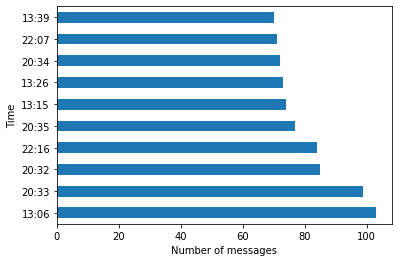

In [51]:
data_whatsapp['Time'].value_counts().head(10).plot.barh()
plt.xlabel('Number of messages')
plt.ylabel('Time')

Text(0, 0.5, 'Date')

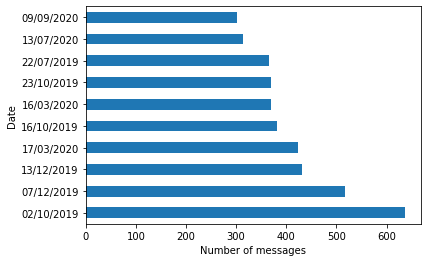

In [52]:
data_whatsapp['Date'].value_counts().head(10).plot.barh()
plt.xlabel('Number of messages')
plt.ylabel('Date')

In [53]:
text = " ".join(review for review in data_whatsapp.Message)
stopwords = set(STOPWORDS)
stopwords.update(["Arquivo", "mídia", "oculto", "de", "pra", "que", "uma", "um", "só", "ve", "da"])

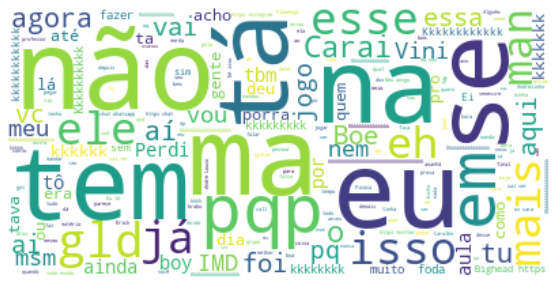

In [54]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [55]:
from collections import Counter

list_message_freq = data_whatsapp.Message.str.split().apply(Counter)

list_message_freq

Author
User0    {'‎The': 1, 'Bighead': 1, 'criou': 1, 'o': 1, ...
User0    {'‎The': 1, 'Bighead': 1, 'adicionou': 1, 'voc...
User1    {'<Arquivo': 1, 'de': 1, 'mídia': 1, 'oculto>'...
User2                                             {'🥺': 1}
User3    {'<Arquivo': 1, 'de': 1, 'mídia': 1, 'oculto>'...
                               ...                        
User4    {'<Arquivo': 1, 'de': 1, 'mídia': 1, 'oculto>'...
User4    {'<Arquivo': 1, 'de': 1, 'mídia': 1, 'oculto>'...
User2               {'pai': 1, 'tá': 1, 'off': 1, 'hj': 1}
User0    {'Picoca:': 1, 'https://www.instagram.com/p/CH...
User2    {'Fizessem': 1, 'cmg': 1, 'caiam': 1, 'com': 1...
Name: Message, Length: 34549, dtype: object

In [56]:
count = data_whatsapp.Message.str.split(expand=True).stack().value_counts()

count

de                                                  8013
mídia                                               5156
oculto>                                             5150
<Arquivo                                            5150
o                                                   2638
                                                    ... 
95.isaque                                              1
https://chat.whatsapp.com/HKt1ej2TAV05XN94naX3zH       1
posso,                                                 1
ignore,                                                1
20min                                                  1
Length: 23477, dtype: int64

In [59]:
count[80:100]

d           203
ainda       203
Perdi       203
Bighead:    198
Boe         198
Que         195
3           194
tbm         190
lá          189
tava        187
era         186
dia         184
-           184
Tô          182
bom         181
pro         178
até         176
Gld         175
gente       174
ver         172
dtype: int64